### PCA Project (Observing Data)
In this project, we will classify particles into gamma(signal) or hadrons(background). Given that the features are correlated, we will perform PCA to get a new set of features, and select the features that contain the most information. The data set was generated by a Monte Carlo program, Corsika, described in D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers, Forschungszentrum Karlsruhe FZKA 6019 (1998).

1. Remove any nulls from the dataset.

2. Extract the numerical columns onto a variable named data_matrix and the classes to a variable named classes
3. Create a correlation matrix of the data matrix and show it as a heatmap.
4. Find the eigenvectors and eigenvalues using the NumPy function np.linalg.eig. Here we also order the eigenvalues from greatest to smallest by ordering its indices first, and use these indices to also order the eigenvalues.
5. Find the proportions of each eigenvalue to the total sum of the eigenvalues. These proportions represent the percentages of information that each eigenvalue’s associated eigenvector contains.
6. Find the cumulative percentages of the ordered eigenvectors.

Task 1:
    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  
Task 2:
        fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922

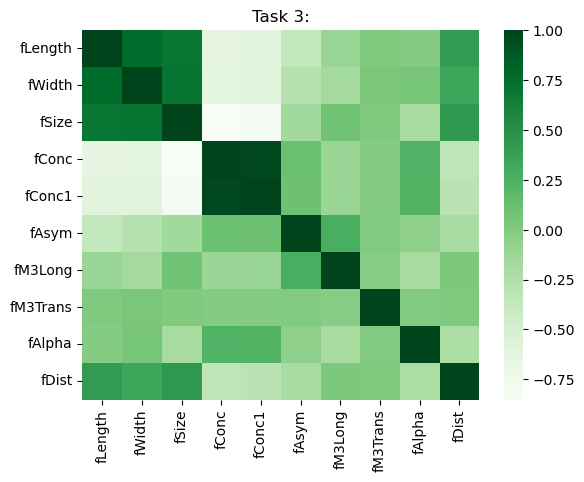

Task 4:
Eigenvalues length: 10, Original Number of Features: 10
[4.2239909  1.5751879  1.01180532 0.9940127  0.74201939 0.65008647
 0.4075386  0.22036243 0.15475338 0.02024291] (10, 10)


<Figure size 640x480 with 0 Axes>

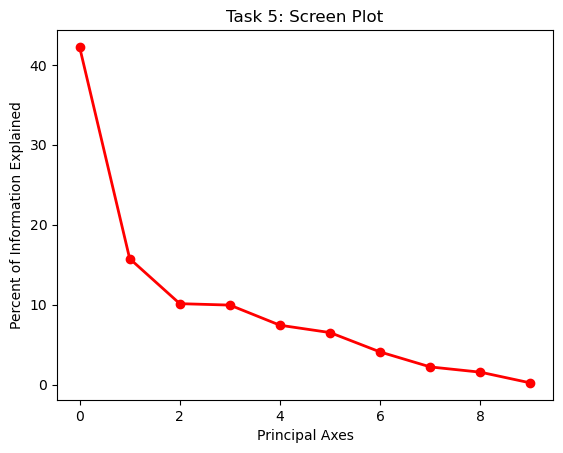

<Figure size 640x480 with 0 Axes>

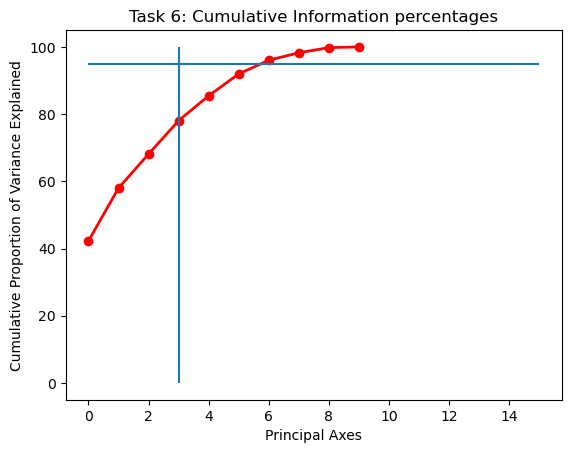

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------
# 1: Drop nan values.
# ---------------

# Read the csv data as a DataFrame
df = pd.read_csv('./telescope_data.csv', index_col=0)

# Remove null and na values
df.dropna()

# Print the DataFrame head
print('Task 1:')
print(df.head())


# ---------------
# 2: Extract class column.
# ---------------
# Extract the class classes
classes = df['class']
data_matrix = df.drop(columns='class')

print('Task 2:')
print(data_matrix)

# ---------------
# 3: Create a correlation matrix.
# ---------------
# Use the `.corr()` method on `data_matrix` to get the correlation matrix 
correlation_matrix = data_matrix.corr()

ax = plt.axes()
sns.heatmap(correlation_matrix, cmap='Greens', ax=ax)
ax.set_title('Task 3:')
plt.show()
plt.clf()


# ---------------
# 4: Perform eigendecomposition.
# ---------------
print('Task 4:')

# Perform eigendecomposition using `np.linalg.eig` 
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print(f'Eigenvalues length: {eigenvalues.size}, Original Number of Features: {data_matrix.shape[1]}')

# Order the eigenvalues by ordering the indices of the eigenvalues using `argsort`, and use [::-1] to order them from greatest to smallest
indices = eigenvalues.argsort()[::-1]  
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[:, indices]

print(eigenvalues, eigenvectors.shape)

# ---------------
# 5: Find the variance/information percentages for each eigenvalue.
# ---------------
# Find the percentages of information for each eigenvector, which is generated by the proportion of its eigenvalues to the sum of all eigenvalues
information_proportions = eigenvalues / eigenvalues.sum()
information_percents = information_proportions * 100.0

# Plot the principal axes vs the information proportions for each principal axis
plt.figure()
plt.plot(information_percents, 'ro-', linewidth=2)
plt.title('Task 5: Screen Plot')
plt.xlabel('Principal Axes')
plt.ylabel('Percent of Information Explained')
plt.show()
plt.clf()

# ---------------
# 6: Find the cumulative variance/information percentages for each eigenvalue.
# ---------------
# Find the cumulative sum of the percentages
cumulative_information_percents = np.cumsum(information_percents)

# Plot the cumulative percentages array
plt.figure()
plt.plot(cumulative_information_percents, 'ro-', linewidth=2)

# Also plot a horizontal line indicating the 95% mark, and a vertical line for the third principal axis
plt.hlines(y=95, xmin=0, xmax=15)
plt.vlines(x=3, ymin=0, ymax=100)
plt.title('Task 6: Cumulative Information percentages')
plt.xlabel('Principal Axes')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()
plt.clf()